Epoch 1/5
578/578 [==============================] - 3s 2ms/step - loss: 1.2962 - accuracy: 0.4161
Epoch 2/5
578/578 [==============================] - 1s 2ms/step - loss: 1.2165 - accuracy: 0.4629
Epoch 3/5
578/578 [==============================] - 1s 2ms/step - loss: 1.1949 - accuracy: 0.4707
Epoch 4/5
578/578 [==============================] - 1s 2ms/step - loss: 1.1803 - accuracy: 0.4858
Epoch 5/5
1/1 [==============================] - 0s 53ms/step
Predicted Gesture: 2


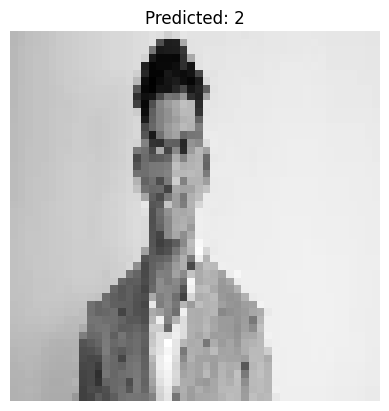

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
# Load the dataset
train_gesture = np.load('gesture recog/train_gesture.npy')  # Training data
train_gesture_label = np.load('gesture recog/train_gesture_labels.npy')  # Training labels
validation_gesture = np.load('gesture recog/validation_gesture.npy')  # Validation data
validation_gesture_label = np.load('gesture recog/validation_gesture_labels.npy')  # Validation labels

# Normalize the data
train_gesture = train_gesture / 255.0
validation_gesture = validation_gesture / 255.0

# One-hot encode the labels
num_classes = len(np.unique(train_gesture_label))
train_gesture_label = to_categorical(train_gesture_label, num_classes)
validation_gesture_label = to_categorical(validation_gesture_label, num_classes)

# Simple neural network model
model = Sequential([
    Flatten(input_shape=train_gesture.shape[1:]),  # Flatten input
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_gesture, train_gesture_label, epochs=5, batch_size=32)

# Test a sample image
def test_sample_image(sample_image_path):
    # Load the image
    img = plt.imread(sample_image_path)
    
    # Convert to grayscale if it's an RGB image
    if len(img.shape) == 3:
        img = np.mean(img, axis=-1)
    
    # Ensure the image has 2D shape for resizing
    img = np.expand_dims(img, axis=-1) if len(img.shape) == 2 else img
    img = img[..., 0]  # Select the first channel if it's 3D

    # Resize the image to match the input shape of the model
    img = cv2.resize(img, (48, 48))  # Using OpenCV to resize
    
    # Normalize the image
    img = img / 255.0
    
    # Add batch and channel dimensions
    img = np.expand_dims(img, axis=(0, -1))

    # Predict gesture
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)

    # Display the prediction and image
    print(f"Predicted Gesture: {predicted_class}")
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()
# sample image
test_sample_image("C:/Users/SAINATH NIKAM/Desktop/CV&DL Lab/CV CODES/Final Practical Practice/gesture2.jpeg")  # Replace with your test image path
